## Introduction to GD

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-5, 5, step=0.1)

In [4]:
y = 2*x**2 - 2*x + 3

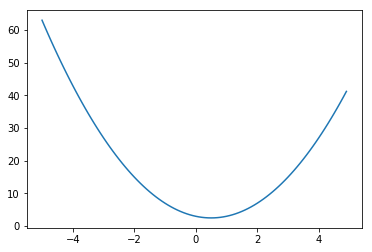

In [5]:
plt.plot(x, y)
plt.show()

In [6]:
def grad(x):
    return 4*x-2

def f(x):
    return 2*x**2-2*x+3

In [7]:
# x = np.random.randint(-5, 5)
x_min = -4
x_min_arr = []
alpha = 0.1
for i in range(150):
#     print(f"x_min = {x_min}")
    x_min_arr.append(x_min)
    x_min = x_min - alpha*grad(x_min)

x_min_arr = np.array(x_min_arr)

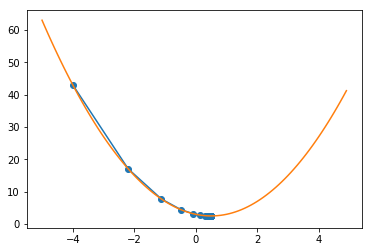

In [8]:
plt.plot(x_min_arr, f(x_min_arr))
plt.scatter(x_min_arr, f(x_min_arr))
plt.plot(x, y)
plt.show()

In [9]:
x_min

0.49999999999999994

## GD in Linear Regression

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x_csv = pd.read_csv("C:/Users/BobStone/Desktop/Training Data/Linear_X_Train.csv")
y_csv = pd.read_csv("C:/Users/BobStone/Desktop/Training Data/Linear_y_Train.csv")

In [12]:
x_csv.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [13]:
y_csv.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


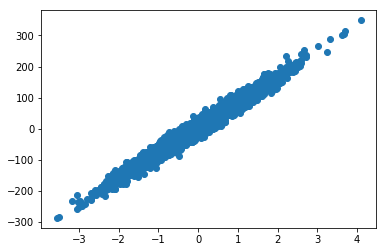

In [14]:
plt.scatter(x_csv, y_csv)
plt.show()

In [15]:
X = x_csv.values
y = y_csv.values

In [16]:
X.shape, y.shape

((3750, 1), (3750, 1))

In [17]:
std = X.std()
mean = X.mean()

In [18]:
X = (X - mean)/std

In [19]:
def hypothesis(X, theta1, theta0):
    return theta1*X + theta0

def error(X, theta1, theta0, y_true):
    y_pred = hypothesis(X, theta1, theta0)
    
    return np.mean((y_true - y_pred)**2)


def gradient_descent(X, y, lr=0.001, n_epochs=1000):
    theta1 = np.random.randn(1)
    theta0 = np.random.randn(1)
    
    for i in range(n_epochs):
        grad_theta1 = -2*((y - hypothesis(X, theta1, theta0))*X).mean()
        grad_theta0 = -2*(y - hypothesis(X, theta1, theta0)).mean()
        
        theta1 = theta1 - lr*grad_theta1
        theta0 = theta0 - lr*grad_theta0
    return theta1, theta0

In [20]:
theta1, theta0 = gradient_descent(X, y, n_epochs=3000)

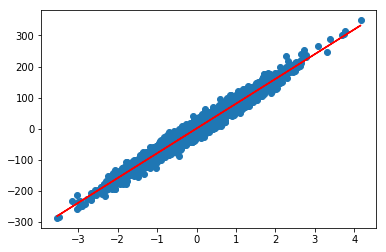

In [21]:
plt.scatter(X, y)
plt.plot(X, hypothesis(X, theta1, theta0), color="red")
plt.show()

In [30]:
x_test_csv = pd.read_csv("C:/Users/BobStone/Desktop/Test Cases/Linear_X_Test.csv")
x_test = (x_test_csv.values - mean)/std

In [33]:
y_pred = hypothesis(x_test, theta1, theta0)

In [34]:
y_pred

array([[-147.15731432],
       [ -66.09768077],
       [-199.56044564],
       ...,
       [  14.00805276],
       [ -18.61508579],
       [ -50.94436193]])

In [35]:
submission = pd.read_csv("C:/Users/BobStone/Desktop/Test Cases/sample_submission_linear.csv")

In [38]:
submission["y"] = y_pred

In [40]:
submission.to_csv("C:/Users/BobStone/Desktop/Test Cases/submission.csv", index=False)

In [43]:
def r2_score(y_pred, y_true):
    
    e_pred = ((y_pred - y_true)**2).sum()
    e_mean = ((y_true.mean() - y_true)**2).sum()
    
    return (1 - e_pred/e_mean)*100

In [45]:
print("Train r2 Score:", r2_score(hypothesis(X, theta1, theta0), y))

Train r2 Score: 97.09552315235854
